## Data cleaning and EDA

In [1]:
# Importing the files
import urllib.request
import zipfile
from pathlib import Path
import pandas as pd

def unzip(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

def load_kickstarter_dataset():
    zip_path = Path("datasets/kickstarter_data.zip")
    datasets_path = Path("datasets")
    
    if not zip_path.is_file():
        datasets_path.mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ddkale2022/ML-Project/raw/main/datasets/kickstarter.zip"  # Direct download link
        urllib.request.urlretrieve(url, zip_path)
        unzip(zip_path, datasets_path)
    
    # Update this path to the actual path of the CSV inside the extracted contents
    csv_path = datasets_path / "kickstarter/kickstarter.csv"  # Adjust according to the actual path
    if not csv_path.is_file():
        raise FileNotFoundError(f"CSV file not found at expected location: {csv_path}")
    
    return pd.read_csv(csv_path)
df = load_kickstarter_dataset()

#df = load_kickstarter_dataset()
df.columns=df.columns.str.lower()

In [2]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
# save figures in folder
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# creating yr_launched column
import datetime
df['yr_launched']=pd.to_datetime(df["launched"]).dt.strftime("%Y")

# Creating duration in days column
from datetime import datetime as dt
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
df['duration_days']=(df["deadline"]-df["launched"]).dt.days

In [5]:
# Creating the 'goal_bin' column
df["goal_bin"] = pd.cut(df["goal"], bins=[0, 80, 800, 8000, 80000], labels=[1, 2, 3, 4])

In [6]:
to_drop = ['id','name','backers','pledged','deadline','launched']
df.drop(to_drop, inplace=True, axis=1)
new_names =  {'state': 'outcome'}
df.rename(columns=new_names, inplace=True)

**Missing values**  

In [7]:
# displays sum of missing values per column
#df.isnull().sum()
# The dataset does not have any missing values 

In [8]:
df = df[df['outcome'].isin(['Successful', 'Failed'])]
df['outcome'] = df['outcome'].replace({'Failed': 0, 'Successful': 1})
df.to_csv('datasets/kickstarter/kickstarter_cleaned.csv', index= False)
#df

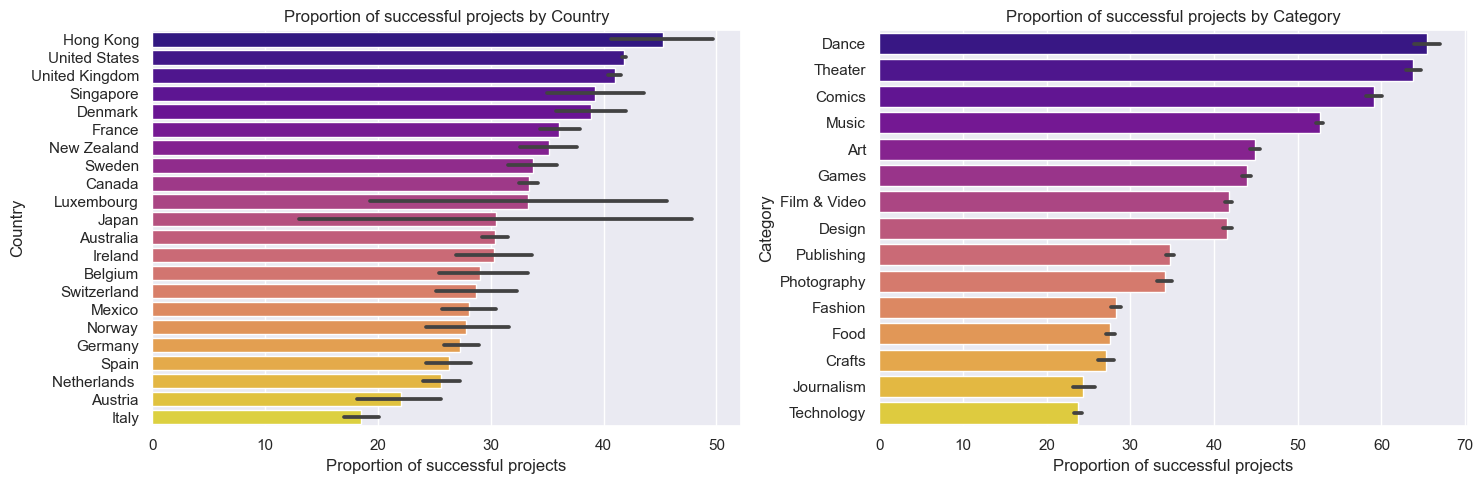

In [9]:
# List of categorical variables
categorical_vars = ['country', 'category']

# Set up subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for var, ax in zip(categorical_vars, axes):
    # Plot setup
    sns.barplot(data=df, x='outcome', y=var, palette='plasma',
                order=df.groupby(var)['outcome'].agg('mean').sort_values(ascending=False).index,
                estimator=lambda x: sum(x)*100/len(x), ax=ax)
    
    # Set title and labels
    ax.set_title(f'Proportion of successful projects by {var.capitalize()}')
    ax.set_xlabel('Proportion of successful projects')
    ax.set_ylabel(var.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

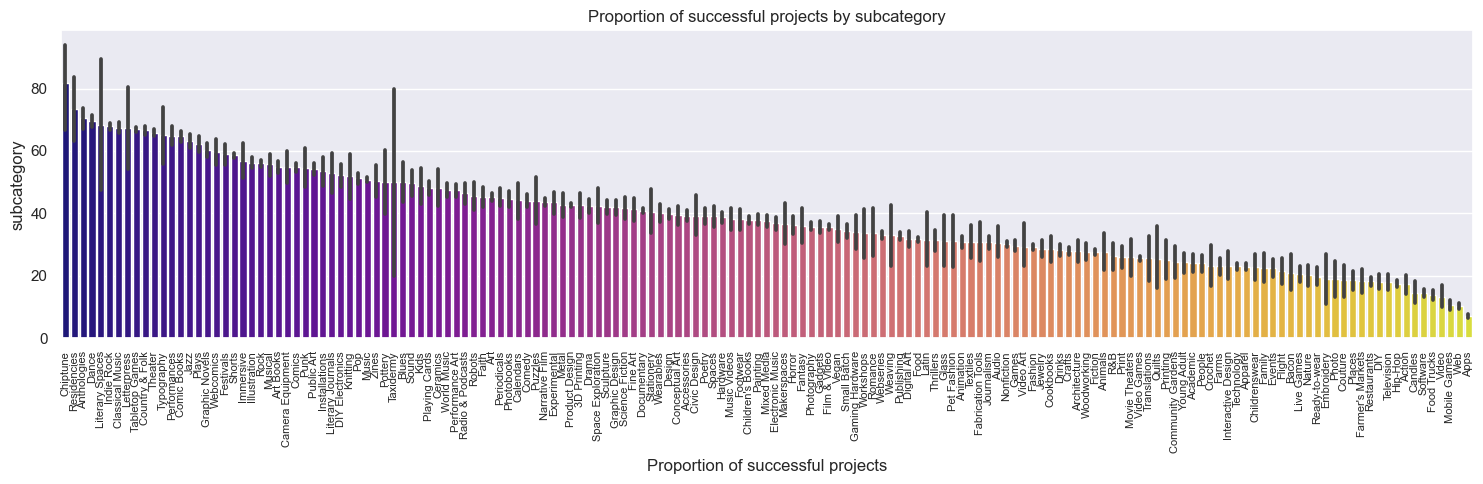

In [12]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df, y='outcome', x='subcategory', palette='plasma',
                 order=df.groupby('subcategory')['outcome'].agg('mean').sort_values(ascending=False).index
                 ,estimator=lambda y: sum(y)*100/len(y)
                 )
plt.title('Proportion of successful projects by subcategory')
plt.xlabel('Proportion of successful projects')
plt.ylabel('subcategory')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

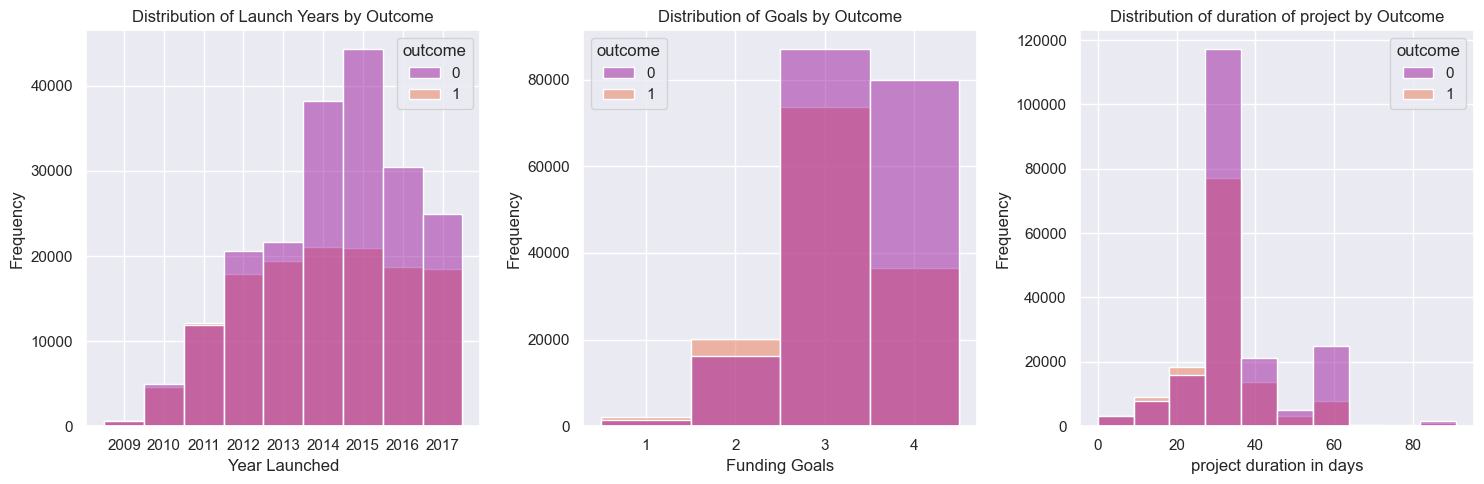

In [11]:
# Create figure and axes objects
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the first histogram
sns.histplot(data=df, x='yr_launched', hue='outcome', palette='plasma', ax=axes[0]) \
    .set(title='Distribution of Launch Years by Outcome', xlabel='Year Launched', ylabel='Frequency')
axes[0].grid(True)

# Plotting the second histogram
sns.histplot(data=df, x='goal_bin', hue='outcome', palette='plasma', ax=axes[1]) \
    .set(title='Distribution of Goals by Outcome', xlabel='Funding Goals', ylabel='Frequency')
axes[1].grid(True)

# Plotting the third histogram
sns.histplot(data=df, x='duration_days', hue='outcome', palette='plasma', ax=axes[2],bins = 10) \
    .set(title='Distribution of duration of project by Outcome', xlabel='project duration in days', ylabel='Frequency')
axes[2].grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()